In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# Numerical Quadrature

**Goal:** Evaluate integrals

$$ \int^b_a f(x) dx$$

 - Many integrals do not have closed form solutions
 
   $$ \int^b_a \sqrt{1 + \cos^2 x} dx$$

 - Solution to ordinary differential equations
   
   $$\frac{\text{d}^2 u}{\text{d}t^2} = f\left(u, \frac{\text{d} u}{\text{d}t}, t \right)$$
   
   Defining $v = \frac{\text{d} u}{\text{d}t}$ then leads to

   $$\begin{bmatrix}
   \frac{\text{d} v}{\text{d}t} \\ \frac{\text{d} u}{\text{d}t} \end{bmatrix} = \begin{bmatrix} f(u, v, t) \\ v \end{bmatrix}$$
   
   which can be solved by integration
   
   $$\begin{bmatrix}
   v \\ u \end{bmatrix} = \begin{bmatrix} v(t_0) + \int^t_{t_0} f(u, v, \hat{t}) d\hat{t} \\ u(t_0) + \int^t_{t_0} v d\hat{t} \end{bmatrix}$$  
   
 - Solving partial differential equations

## Riemann Sums

Given $f(x)$ and a partition of the interval $[a,b]$ with $\{x_i\}^N_{i=0}$ and $a = x_0 < x_1 < \ldots < x_N = b$ and $x^*_i \in [x_i, x_{i+1}]$ we define the Riemann integral as

$$\int^b_a f(x) dx = \lim_{N\rightarrow \infty} \sum^{N-1}_{i=0} f(x_i^*) (x_{i+1} - x_i)$$

This is a general definition and leads to a number of quadrature approaches based on how we pick $x_i^* \in [x_i, x_{i+1}]$.

### Midpoint Rule

Choose $x_i^*$ such that

$$x_i^* = \frac{x_{i+1} + x_i}{2}$$

so that

$$I[f] = \int^b_a f(x) dx \approx \sum^{N-1}_{i=0} f\left(\frac{x_{i+1} + x_i}{2} \right ) (x_{i+1} - x_i) = Q_m[f]$$

over $\Delta x_i = x_{i+1} - x_i$ 

$$Q_m[f] = \Delta x f\left(\frac{\Delta x}{2} \right )$$

#### Example:  Integrate using midpoint rule

Calculate and illustrate the midpoint rule.  Note that we are computing the cummulative integral here:

$$\int^x_0 sin(\hat{x}) d\hat{x} = -\cos \hat{x} |^x_0 = 1 - \cos x$$

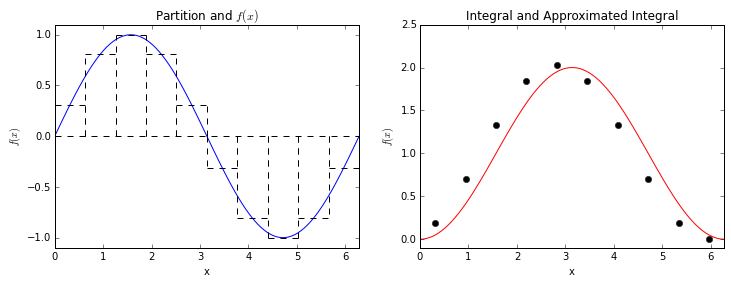

In [7]:
# Note that this calculates the cummulative integral from 0.0

f = lambda x: numpy.sin(x)
If = lambda x: 1.0 - numpy.cos(x)
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

num_partitions = 10
x_hat = numpy.linspace(0.0, 2.0 * numpy.pi, num_partitions + 1)
x_star = 0.5 * (x_hat[1:] + x_hat[:-1])
delta_x = x_hat[1] - x_hat[0]

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2.0)
axes = fig.add_subplot(1, 2, 1)

axes.plot(x, numpy.zeros(x.shape), 'k--')
axes.plot(x, f(x), 'b')

for i in xrange(num_partitions):
    axes.plot([x_hat[i], x_hat[i]], [0.0, f(x_star[i])], 'k--')
    axes.plot([x_hat[i + 1], x_hat[i + 1]], [0.0, f(x_star[i])], 'k--')
    axes.plot([x_hat[i], x_hat[i + 1]], [f(x_star[i]), f(x_star[i])], 'k--')
    
axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Partition and $f(x)$")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-1.1, 1.1))

Qf = numpy.zeros(x_star.shape)
Qf[0] = f(x_star[0]) * delta_x
for i in xrange(1, num_partitions):
    Qf[i] = Qf[i - 1] + f(x_star[i]) * delta_x
    
axes = fig.add_subplot(1, 2, 2)

axes.plot(x, If(x), 'r')
axes.plot(x_star, Qf, 'ko')

axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Integral and Approximated Integral")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-0.1, 2.5))

plt.show()
    


## Quadrature

A method to evaluate $I[f]$ using a discrete, finite number of function evaluations:

$$Q[f] = \sum^M_{i=0} w_i f(x_i)$$

where $w_i$ are weights.  A particular quadrature method will specify the weights $w_i$ and the points $x_i$ to evaluate the function $f(x)$ at.

### Error Analysis

Define the error $E[f]$ such that

$$I[f] = Q[f] + E[f]$$

The degree of $Q[f]$ is the integer $n$ such that $E[p_i] = 0~~~ \forall i \leq n$ and $\exists p_{n+1}$ such that $E[p_{n+1}] \neq 0$.

### Newton-Cotes Quadrature

Using $N+1$ equally spaced points, evaluate $f(x)$ at these points and exactly integrate the interpolating polynomial exactly.

$$Q[f] = \int^b_a P_N(x) dx$$

### Trapezoidal Rule

Trapezoidal rule uses $N = 1$ order polynomials between each point (i.e. piece-wise defined linear polynomials).  The coefficients of the polynomial in each interval are

$$p_0 = f(x_i) ~~~~~ p_1 = \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i}$$

which gives the interpolating polynomial

$$p_1(x) = \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i} ( x- x_i) + f(x_i)$$

Integrating this polynomial we have

$$Q[f] = \int^{x_{i+1}}_{x_i} (p_0 + p_1 (x - x_i)) dx = \left . p_0 x + p_1 \left (\frac{x^2}{2} - x_i x\right) \right |^{x_{i+1}}_{x_i}$$

$$= p_0 \Delta x + p_1 \left (\frac{1}{2} (x_{i+1} + x_i) \Delta x - x_i \Delta x\right) $$

$$= f(x_i) \Delta x + (f(x_{i+1}) - f(x_i))\left (\frac{1}{2} (x_{i+1} + x_i) - x_i\right) $$

$$= f(x_i) \Delta x + (f(x_{i+1}) - f(x_i)) \frac{\Delta x}{2} $$

$$= \frac{\Delta x}{2} (f(x_{i+1}) + f(x_i))  $$

We can also simplify the sum over all the intervals by noting that all but the end points will have total contribution of $\Delta x$ to the entire sum such that

$$Q[f] = \frac{\Delta x}{2} (f(x_0) + f(x_N) ) \sum^{N-1}_j=1 f(x_j)$$

This is known as the composite trapezoidal rule.

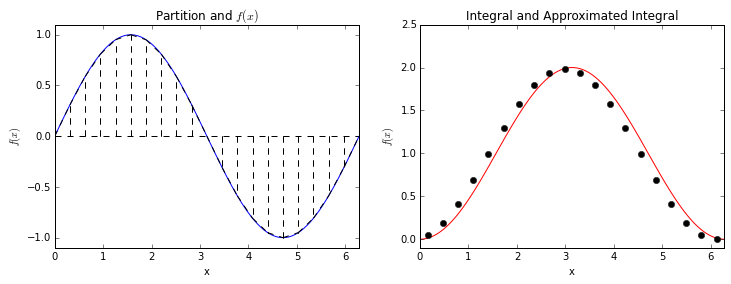

In [17]:
# Note that this calculates the cummulative integral from 0.0

f = lambda x: numpy.sin(x)
If = lambda x: 1.0 - numpy.cos(x)
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

num_partitions = 20
x_hat = numpy.linspace(0.0, 2.0 * numpy.pi, num_partitions + 1)
delta_x = x_hat[1] - x_hat[0]

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2.0)
axes = fig.add_subplot(1, 2, 1)

axes.plot(x, numpy.zeros(x.shape), 'k--')
axes.plot(x, f(x), 'b')

for i in xrange(num_partitions):
    axes.plot([x_hat[i], x_hat[i]], [0.0, f(x_hat[i])], 'k--')
    axes.plot([x_hat[i + 1], x_hat[i + 1]], [0.0, f(x_hat[i+1])], 'k--')
    axes.plot([x_hat[i], x_hat[i + 1]], [f(x_hat[i]), f(x_hat[i+1])], 'k--')
    
axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Partition and $f(x)$")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-1.1, 1.1))

Qf = numpy.zeros(x_hat.shape)
Qf[0] = (f(x_hat[1]) + f(x_hat[0])) * delta_x / 2.0
for i in xrange(1, num_partitions):
    Qf[i] = Qf[i - 1] + (f(x_hat[i + 1]) + f(x_hat[i])) * delta_x / 2.0
    
axes = fig.add_subplot(1, 2, 2)

axes.plot(x, If(x), 'r')
axes.plot(x_hat + delta_x / 2.0, Qf, 'ko')

axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Integral and Approximated Integral")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-0.1, 2.5))

plt.show()
    



### Simpson's Rule

Simpson's rule uses $N = 2$ order polynomials between each point (i.e. piece-wise defined quadratic polynomials).  The polynomial has the form

$$P_2(x) = \frac{2 f(x_i)}{\Delta x^2} \left (x - \frac{\Delta x}{2} \right ) (x - \Delta x) - \frac{4 f\left(x_i + \frac{\Delta x}{2}\right)}{\Delta x^2}  x (x - \Delta x) + \frac{2 f(x_{i+1})}{\Delta x^2} x \left (x - \frac{\Delta x}{2} \right )$$

Integrating this polynomial we have

$$Q[f] = \int^{x_{i+1}}_{x_i} P_2(x) dx = \frac{\Delta x}{6} f(x_i) + \frac{2 \Delta x}{3} f\left(x_i + \frac{\Delta x}{2} \right ) + \frac{\Delta x}{6} f(x_{i+1})$$

Another way to write Simpson's rule is to use intervals of three points (similar to one of the ways we did this last time).  The formulation here effectively has a $\Delta x$ half of what the intervals show but is easier to program.

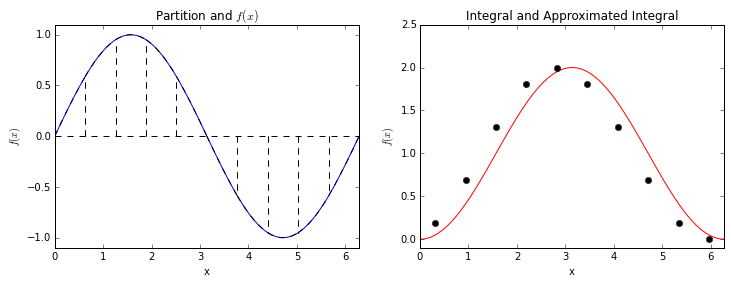

In [23]:
# Note that this calculates the cummulative integral from 0.0

f = lambda x: numpy.sin(x)
If = lambda x: 1.0 - numpy.cos(x)
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

num_partitions = 10
x_hat = numpy.linspace(0.0, 2.0 * numpy.pi, num_partitions + 1)
delta_x = x_hat[1] - x_hat[0]

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2.0)
axes = fig.add_subplot(1, 2, 1)

axes.plot(x, numpy.zeros(x.shape), 'k--')
axes.plot(x, f(x), 'b')

for i in xrange(num_partitions):
    axes.plot([x_hat[i], x_hat[i]], [0.0, f(x_hat[i])], 'k--')
    axes.plot([x_hat[i + 1], x_hat[i + 1]], [0.0, f(x_hat[i+1])], 'k--')
    coeff = numpy.polyfit((x_hat[i], x_hat[i] + delta_x / 2.0, x_hat[i+1]), 
                          (f(x_hat[i]), f(x_hat[i] + delta_x / 2.0), f(x_hat[i+1])), 2)
    x_star = numpy.linspace(x_hat[i], x_hat[i+1], 10)
    axes.plot(x_star, numpy.polyval(coeff, x_star), 'k--')
    
axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Partition and $f(x)$")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-1.1, 1.1))

Qf = numpy.zeros(x_hat.shape)
Qf[0] = delta_x * (1.0 / 6.0 * (f(x_hat[0]) + f(x_hat[1])) + 2.0 / 3.0 * f(x_hat[0] + delta_x / 2.0))
for i in xrange(1, num_partitions):
    Qf[i] = Qf[i - 1] + delta_x * (1.0 / 6.0 * (f(x_hat[i]) + f(x_hat[i+1])) + 2.0 / 3.0 * f(x_hat[i] + delta_x / 2.0))
    
axes = fig.add_subplot(1, 2, 2)

axes.plot(x, If(x), 'r')
axes.plot(x_hat + delta_x / 2.0, Qf, 'ko')

axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Integral and Approximated Integral")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-0.1, 2.5))

plt.show()
    




### Quadrature Accuracy

We can also use our polynomial analysis from before to analyze the errors made using both of the aforementioned methods.  From Lagrange's theorem we have the remainder term as before which we can use to look at the error

$$R_N(x) = (x - x_0)(x - x_1) \cdots (x- x_N) \frac{f^{(N+1)}(c)}{(N+1)!}$$

and integrate it to find the form and magnitude of the error on a single interval.  To find the total error we must sum the error over all the intervals:

$$I[f] = \sum_{i=0}^N \int^{x_{i+1}}_{x_i} P_N(x) dx + \sum_{i=0}^N \int^{x_{i+1}}_{x_i} R_N(x) dx = Q[f] + E[f]$$

as we defined before

#### Trapezoidal error

With $N=1$ we have

$$R_1(x) = (x - x_i) (x - x_{i+1}) \frac{f''(c)}{2}$$

Integrating this leads to

$$\int^{x_{i+1}}_{x_i} (x - x_i) (x - x_{i+1}) \frac{f''(c)}{2} dx = \frac{\Delta x^3}{12} f''(c)$$

giving us a form for the error.  This was only for a single interval, if we sum up across all the intervals the total error is

$$E[f] = -\frac{\Delta x^3}{12} \sum_{i=0}^{N} f''(c_i)$$

or more illustrative

$$E[f] = -\frac{1}{2} \Delta x^2 (b - a) \left [ \frac{1}{N} \sum^{N-1}_{i=0} f''(c_i) \right ]$$

where the expression in the brackets is the mean value of the second derivative over the interval $[a,b]$.  This also shows that the trapezoidal rule converges quadratically as $\Delta x \rightarrow 0$.

#### Simpson's Rule Error

Similarly here we have $N = 2$ and 

$$R_2(x) = (x - x_i) \left(x - x_i - \frac{\Delta x}{2} \right) (x - x_{i+1}) \frac{f'''(c)}{3!}$$

Integrating and summing the error contributions we find

$$E[f] = -\frac{1}{180} (b - a) \Delta x^4 f^{(4)}(c)$$

Interestingly we have gained two orders of accuracy by increasing the polynomial order by only 1!


##### Example 1: 

Given $f(x) = \sin \pi x$ analyze the expected error